# Heart Disease Prediction
### Machine Learning - Binary Classification

### Dataset Info

1. age - Age of the patient
2. sex - Sex of the patient
3. cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
4. trtbps - Resting blood pressure (in mm Hg)
5. chol - Cholestoral in mg/dl fetched via BMI sensor
6. fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
7. restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
8. thalachh - Maximum heart rate achieved
9. oldpeak - Previous peak
10. slp - Slope ()
11. caa - Number of major vessels (0-3) colored by flourosopy
12. thal - Thalium Stress Test result - thal 1 = normal; 2 = fixed defect; 3 = reversable defect
13. output - Target variable 


Importing Libraries

In [1]:
###importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#create a variable to store the path to the data
CSV_PATH = os.path.join(os.getcwd(), 'heart.csv')

In [4]:
os.getcwd()

'c:\\Users\\Zieyla\\Desktop\\ml\\heart'

# 1.0 Data Loading

In [5]:
#df = pd.read_csv('heart.csv') #relative path
df = pd.read_csv(CSV_PATH) #absolute path

In [6]:
#data inspection
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#return the sum of unique values in each column
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

5 continuous data
- how to know?
    - whatever larger than 10 to be continuous data

# 2.0 EDA

- Choose suitable representation to plot
- Jot down your observation, or questions to be answered next
- Questions to ask yourself:
    1. Do I need to clean the data?
    2. What are the relationships of X to my target variable y  

In [10]:
#separating the con vs cat columns
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [11]:
df_con = df[['age','trtbps','chol','thalachh','oldpeak']]

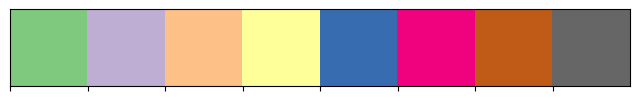

In [12]:
#setting the color palette
sns.palplot(sns.color_palette('Accent'))
sns.set_palette('Accent')
sns.set_style('whitegrid')

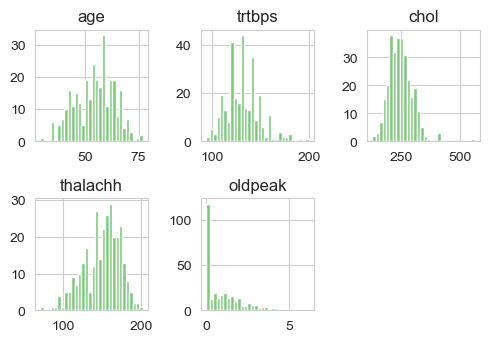

In [53]:
#plot histogram for each continuous variable
df_con.hist(bins=30, figsize=(5,5), layout=(3,3))
plt.tight_layout()
plt.show()

- Count plot for categorical data
- What other plots could we use to study the relationship?
- Observation?

In [14]:
#drop columns
df_cat = df.drop(df_con.columns, axis=1)

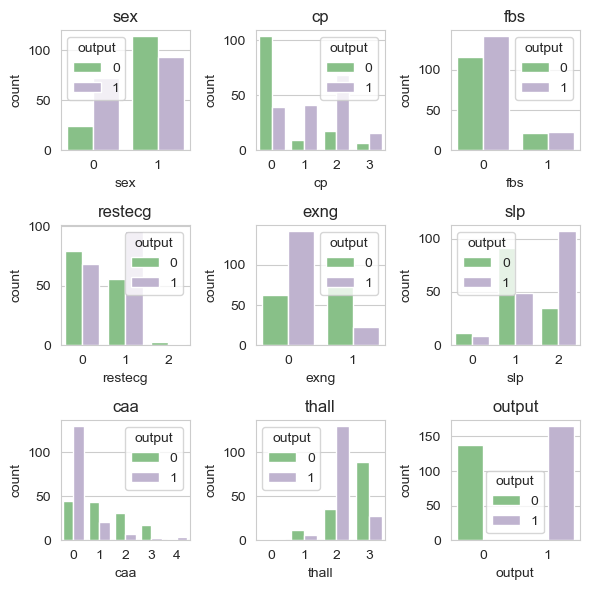

In [55]:
#count plots vs output of each categorical variable
fig, axs = plt.subplots(3,3, figsize=(6,6))
axs = axs.ravel()

for i, column in enumerate(df_cat.columns):
    sns.countplot(x=column, hue='output', data=df_cat, ax=axs[i])
    axs[i].set_title(f"{column}")
    plt.tight_layout()


- How is the distribution?
- 1st thing to see is output 
- how many observations we have/whether have balance dataset/class
- column sex, how many are 0 and 1
- output:slightly imbalance dataset

- refer the text file & compare it to the graph
- at thall, has 1 data only at 0,
- at caa there's 4 it should only be 3
- it might be wrongly keyed in, dirty dataset

Observation:
- column caa has some anomaly value=4
- thall has also has anomaly value=0

- Slightly imbalance dataset 
- 0-female, 1-male

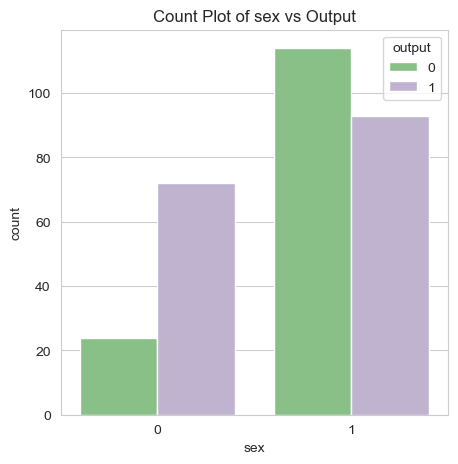

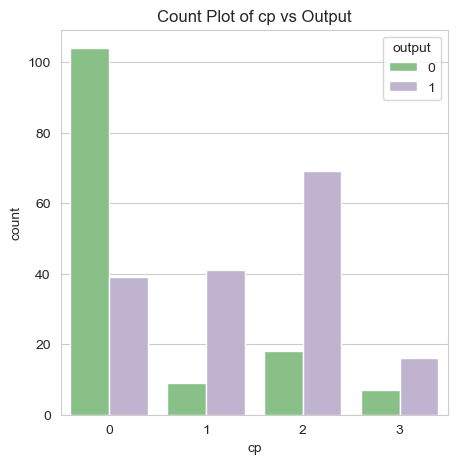

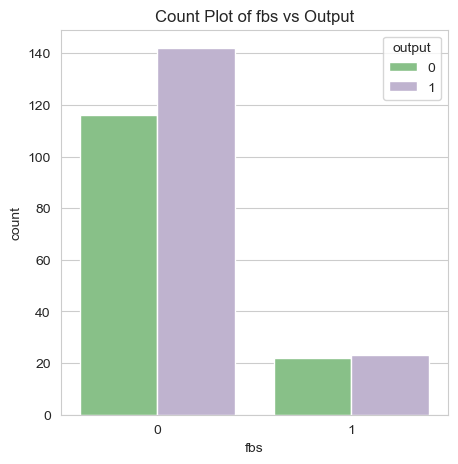

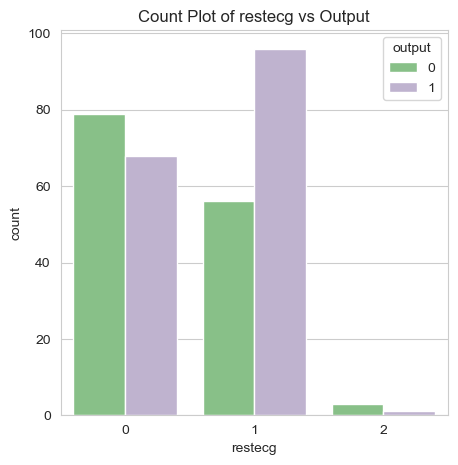

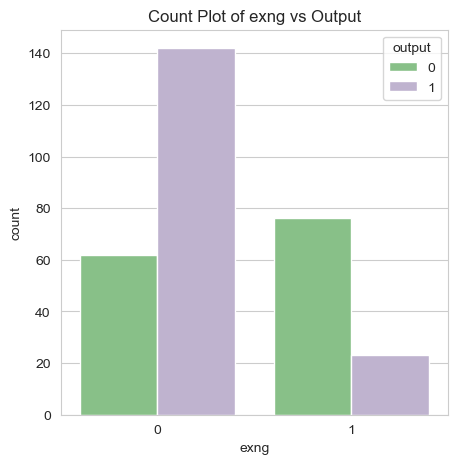

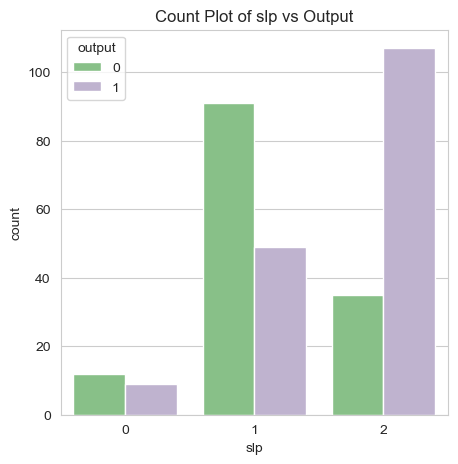

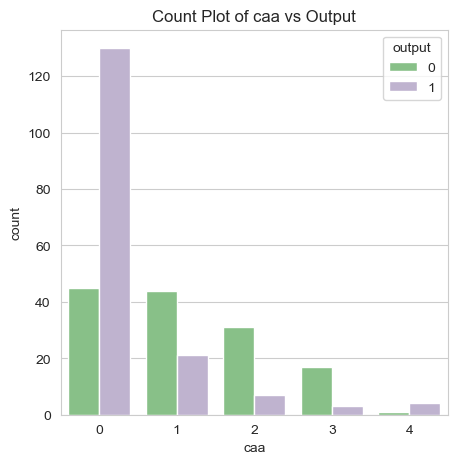

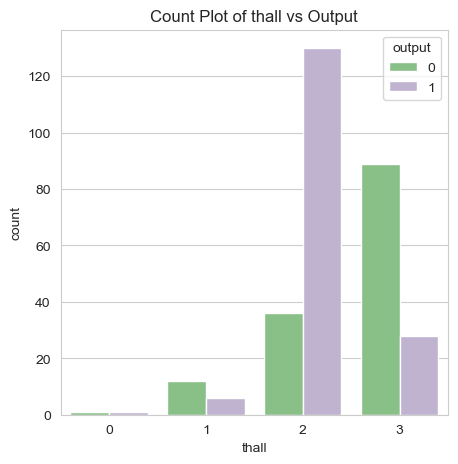

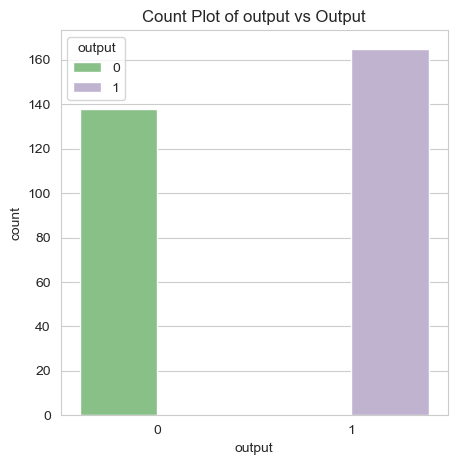

In [56]:
#get the categorical columns
#loop over each columns in the cat df

# Create count plots for each categorical column
for column in df_cat.columns:
    plt.figure(figsize=(5,5))
    # create the count plot
    sns.countplot(x=column, hue='output', data=df_cat)
    
    # set title for each count plot
    plt.title(f"Count Plot of {column} vs Output")
   
    # show the plot
    plt.show()

       # 0:Female 1:Male
    # Who's gender getting higher chance to get heart disease?
    # Female bcs the percentage is higher
    # 70/100 female, male like 40% only 

 

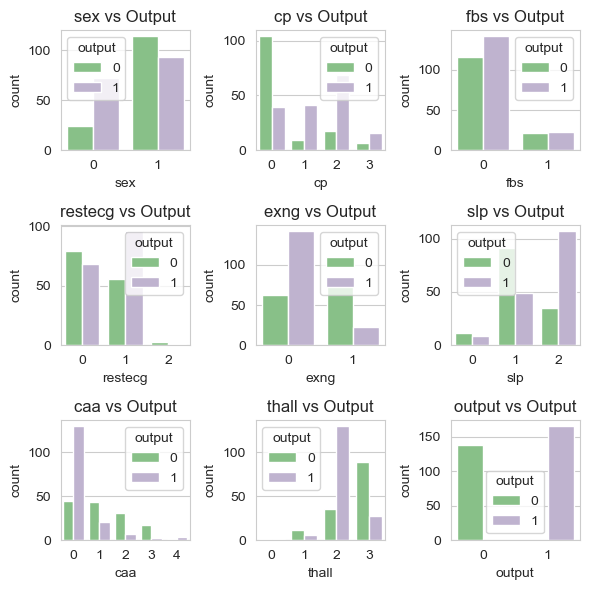

In [57]:
fig, axs = plt.subplots(3,3, figsize=(6,6))

axs = axs.ravel()

for i, column in enumerate(df_cat.columns):
    sns.countplot(x=column, hue='output', data=df_cat, ax=axs[i])

    axs[i].set_title(f"{column} vs Output")

plt.tight_layout()

- plot correlation matrix for continuous variables

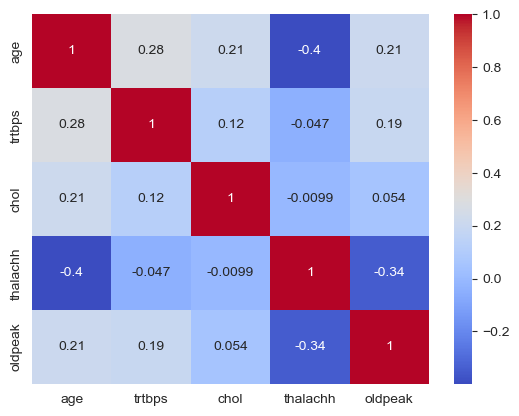

In [13]:
#plotting correlation matrix of the continuous features
# correlation_matrix = df_con.corr() 
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix Heatmap')
# plt.show()

sns.heatmap(df_con.corr(), annot=True, cmap='coolwarm')
plt.show()

# 3.0 Data Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 3.1 Dealing with Missing Data


In [16]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# 3.2 Dealing with Anamolies

#look at the mean, max
#so that dont skewed distribution
#drop data: always check whether the data we drop skewed the original dataset
- a good practice to always make sure the new dataset is not skewed from the original dataset


Anamolies:
- column caa has some anomaly value=4
- thall has also has anomaly value=0

In [17]:
#querying the data with invalid values
df.query('thall == 0 or caa == 4')
#for large dataset can use this
#df.query('thall == 0 or caa == 4').describe().T

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


Notes: Can impute/drop dataset
- We have 7 entries with invalid inputs
- If everything we drop is 0, its going to affect model a lot, bcs we want to have balance model classes
- We can drop some output
- 5 out of 7 observations with output 1(+ve)
- Since we're having a small dataset here, we need to be careful when doing imputation as it might skew the distribution
- We're dropping the rows with invalid inputs
- There's 2 duplicate rows so dont mind dropping 1

In [18]:
df = df.drop(df.query('thall == 0 or caa == 4').index, axis=0)

# 3.3 Dealing with Duplicated Data

In [19]:
#check for duplicated rows
df.duplicated().sum()

#df.drop_duplicates()

0

# 3.1 Dealing with Outliers

How to decide what values
- Refer to domain expert or regulation for acceptable range of medical data
- Take 95% confidence interval, chop(remove the outliers at chol)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
sex,296.0,0.679054,0.467631,0.0,0.0,1.0,1.00,1.0
cp,296.0,0.959459,1.034184,0.0,0.0,1.0,2.00,3.0
trtbps,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
chol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
fbs,296.0,0.145270,0.352970,0.0,0.0,0.0,0.00,1.0
restecg,296.0,0.523649,0.526692,0.0,0.0,1.0,1.00,2.0
thalachh,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
exng,296.0,0.327703,0.470171,0.0,0.0,0.0,1.00,1.0
oldpeak,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2


Notes:
- look at the mean, max for 'chol' for observation
- when we want to drop data: always check whether the data we drop skewed the original dataset or not

<Axes: >

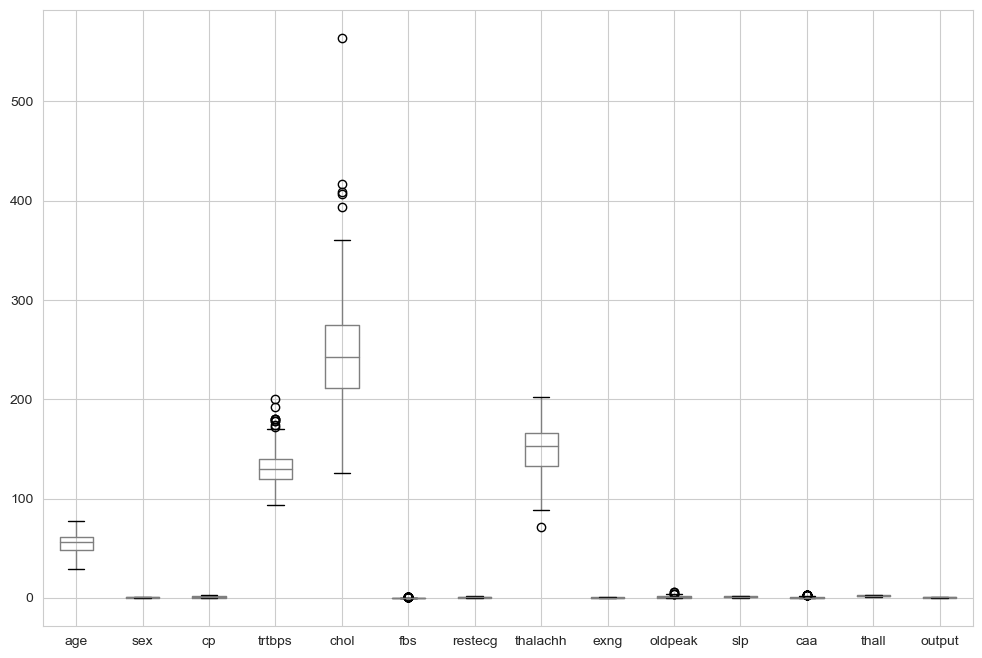

In [66]:
#plotting the boxplot to check for outliers
plt.figure(figsize=(12,8))
df.boxplot()

From the outliers, we can see that 'chol', has an outliers that a bit too far from others. 
- This is why we will use clipping


In [21]:
#clipping the outliers within a reasonable range
df['chol'] = df['chol'].clip(upper=430)#can also set lower value


# 4.0 Feature Engineering


     

### 4.1 Binning/ Bucketing

In [ ]:
#bin continuous variables like 'age'
df['age_group'] = pd.cut(df['age'], bins=[27, 40, 50, 60, 70, 80], labels=['28-40', '40-50', '50-60', '60-70', '70-80'])

#plot the count plot for age_group vs output
plt.figure(figsize=(5,5))
sns.countplot(x='age_group', hue='output', data=df)
plt.title("Count Plot for Age Group vs Output")
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='age_group', data=df)
plt.title("Count Plot for Age Group vs Output")
plt.show()

In [36]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,cluster,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,60-70
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,28-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,40-50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,50-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,50-60


## 4.2 Using K-Means Clustering to segment the data

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [23]:
#applying K-means clustering for a range of clusters from 1 to 10 and computing the WCSS for each clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state=13)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

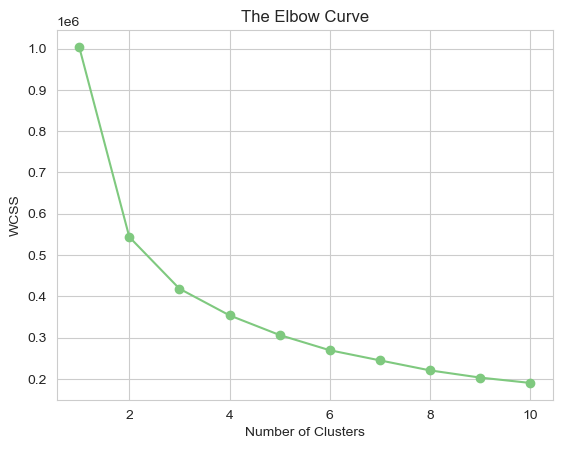

In [26]:
#plotting the Elbow Curve
plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [24]:
#standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler().fit(df.drop(['output'], axis=1))
X_scaled = scaler.transform(df.drop(['output'], axis=1))

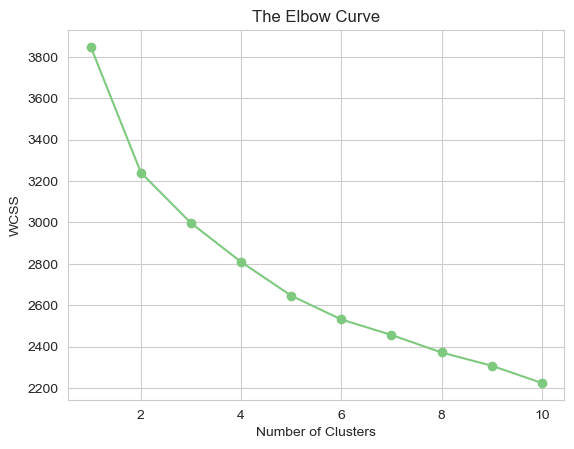

In [25]:
#determine optimal number of clusters using elbow method
#applying K-means clustering for a range of clusters from 1 to 10 and computing the WCSS for each clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state=13)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

#plotting the Elbow Curve
plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [26]:
#based on the 2nd elbow curve, choose 2 as optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=13, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, n_init=10, random_state=13)

In [27]:
#add the cluster labels to the original dataframe as a new column 'cluster'
df['cluster'] = kmeans.labels_
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,cluster
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


# 4.2 Dimension Reduction

- Reduce the noise of dataset

# 5.0  Features Selection

Different function/ method to check the relationship of different data

-  con vs con: correlation coefficient
-  cat vs cat: chi square
-  cat vs col: need to investigate: ANOVA

### 5.1 categorical vs categorical (Chi-square test)

In [31]:
from scipy.stats import chi2_contingency, f_oneway

#categorical vs categorical (Chi-square test)
#contingency table

contingency_table = pd.crosstab(df['sex'], df['output'])
_, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square p-value: {p}")

Chi-square p-value: 1.7188545302135186e-06


### 5.2 categorical vs continuous (ANOVA test)

In [32]:
# categorical vs continuous (ANOVA test)
# ANOVA test
grouped_test = df[['sex', 'chol']].groupby('sex')
_, p = f_oneway(grouped_test.get_group(0)['chol'], grouped_test.get_group(1)['chol'])
#_, p  = f_oneway(*[group for name, group in grouped_test['chol']])
print(f"ANOVA p-value: {p}")

ANOVA p-value: 0.0010727052468067929


# 6.0 Data Preprocessing

## 6.1 Label-Encoding
Converting categorical data in string to labels as scikit-learn models could not take non-numerical data

In [37]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,cluster,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,60-70
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,28-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,40-50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,50-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,50-60


In [39]:
#everytime you have string & categorical data in your dataframe
from sklearn.preprocessing import LabelEncoder

#instantiate the LabelEncoder()
le = LabelEncoder()

#fit the LabelEncoder to the 'age_group' column bcs it is in string, scikit learn cannot 
df['age_group'] = le.fit_transform(df['age_group'])

In [40]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,cluster,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,3
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,2


In [41]:
#make it readable for users/visualization purpose

#to inverse transform the encoded values to 'age_grp' column
df['age_grp'] = le.inverse_transform(df['age_group'])
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,cluster,age_group,age_grp
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,3,60-70
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,0,28-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,1,40-50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,2,50-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,2,50-60


## 6.2 Train Test Split

In [28]:
#train test split
from sklearn.model_selection import train_test_split

#separating features and the target
X = df.drop('output', axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=41, stratify=y) 

# 7.0 Machine Learning Pipelines


In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline

#model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [30]:
#creating pipeline for each model
pipelines = [
    ("MMS + LR", Pipeline([('scaler', MinMaxScaler()), ('lr', LogisticRegression())])),
    ('SS + LR', Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])),
    ('MMS + RF', Pipeline([('scaler', MinMaxScaler()), ('rf', RandomForestClassifier())])),
    ('SS + RF', Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])),
    ('MMS + GB', Pipeline([('scaler', MinMaxScaler()), ('gb', GradientBoostingClassifier())])),
    ('SS + GB', Pipeline([('scaler', StandardScaler()), ('gb', GradientBoostingClassifier())])),
]

In [31]:
#training all the pipelines
for name, pipe in pipelines:
    print(f"Training {name} pipeline")
    pipe.fit(X_train, y_train)

Training MMS + LR pipeline
Training SS + LR pipeline
Training MMS + RF pipeline


Training SS + RF pipeline
Training MMS + GB pipeline
Training SS + GB pipeline


In [32]:
#model evaluation
pipe_dict = {}

#initialising best score to 0
best_score = 0.0

#instantiating an empty string to store the name of the best model
best_pipe = ''

for name, pipe in pipelines:
    y_pred = pipe.predict(X_test)

    pipe_dict[name] = [accuracy_score(y_test, y_pred), 
                          precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred),
                                f1_score(y_test, y_pred, average = 'weighted')]
    
    if pipe.score(X_test, y_test) > best_score:
        best_score = pipe.score(X_test, y_test)
        best_pipe = name

print(f"The best model is {best_pipe} with an accuracy of {best_score}")

The best model is MMS + LR with an accuracy of 0.8426966292134831


In [33]:
name, model = pipelines[0]

print(name)
print(model)

print(pipelines[0][1])

MMS + LR
Pipeline(steps=[('scaler', MinMaxScaler()), ('lr', LogisticRegression())])
Pipeline(steps=[('scaler', MinMaxScaler()), ('lr', LogisticRegression())])


# 8.0 Model Evaluation

- print classification report & confusion matrix


In [48]:
# model_comparison_df.sort_values(by=["Accuracy Score", "F1 Score"],
#                                     ascending=False).style.background_gradient(cmap='pink')

model_comparison_df = pd.DataFrame(pipe_dict, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_comparison_df.sort_values(by='F1 Score', axis=1, ascending=False).T

,Accuracy,Precision,Recall,F1 Score
MMS + LR,0.842697,0.793103,0.958333,0.839193
MMS + RF,0.831461,0.800000,0.916667,0.829323
SS + RF,0.831461,0.800000,0.916667,0.829323
SS + LR,0.820225,0.775862,0.937500,0.816220
SS + GB,0.786517,0.754386,0.895833,0.782506
MMS + GB,0.775281,0.741379,0.895833,0.770275


In [34]:
#model evaluation with added K-means cluster labels
#should be changes in the order and value
model_comparison_df = pd.DataFrame(pipe_dict, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_comparison_df.sort_values(by='F1 Score', axis=1, ascending=False).T

,Accuracy,Precision,Recall,F1 Score
MMS + LR,0.842697,0.793103,0.958333,0.839193
SS + RF,0.820225,0.785714,0.916667,0.817422
SS + LR,0.820225,0.775862,0.937500,0.816220
MMS + RF,0.808989,0.792453,0.875000,0.807515
MMS + GB,0.786517,0.754386,0.895833,0.782506
SS + GB,0.786517,0.754386,0.895833,0.782506


In [ ]:
y_pred = pipelines[0][1].predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

labels = ["No Heart Disease", "Heart Disease"]

cr = classification_report(y_test, y_pred, target_names = labels)
print(cr)

                  precision    recall  f1-score   support

No Heart Disease       0.90      0.66      0.76        41
   Heart Disease       0.76      0.94      0.84        48

        accuracy                           0.81        89
       macro avg       0.83      0.80      0.80        89
    weighted avg       0.83      0.81      0.80        89



# 9.0 Hyperparameter Tuning

- print the classification report of the best model

In [ ]:

from sklearn.model_selection import GridSearchCV

In [ ]:
pipeline_ss_rf = Pipeline([("ss", MinMaxScaler()), ("rf", RandomForestClassifier())])

pipeline_ss_rf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ss', 'rf', 'ss__clip', 'ss__copy', 'ss__feature_range', 'rf__bootstrap', 'rf__ccp_alpha', 'rf__class_weight', 'rf__criterion', 'rf__max_depth', 'rf__max_features', 'rf__max_leaf_nodes', 'rf__max_samples', 'rf__min_impurity_decrease', 'rf__min_samples_leaf', 'rf__min_samples_split', 'rf__min_weight_fraction_leaf', 'rf__n_estimators', 'rf__n_jobs', 'rf__oob_score', 'rf__random_state', 'rf__verbose', 'rf__warm_start'])

In [ ]:
#grid search parameters
grid_params = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10],
}

grid = GridSearchCV(pipeline_ss_rf, grid_params, cv=5, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)
#grid.fit(X,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', MinMaxScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 5, 10],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             verbose=1)

In [ ]:
#print the best parameters
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Score: {grid.best_score_}")
print(f"Grid Search Best Score: {grid.score(X_test, y_test)}")

Best Parameters: {'rf__max_depth': 5, 'rf__min_samples_split': 10, 'rf__n_estimators': 300}
Best Score: 0.8363530778164924
Grid Search Best Score: 0.8314606741573034


Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.71      0.79        41
           1       0.79      0.94      0.86        48

    accuracy                           0.83        89
   macro avg       0.85      0.82      0.83        89
weighted avg       0.84      0.83      0.83        89



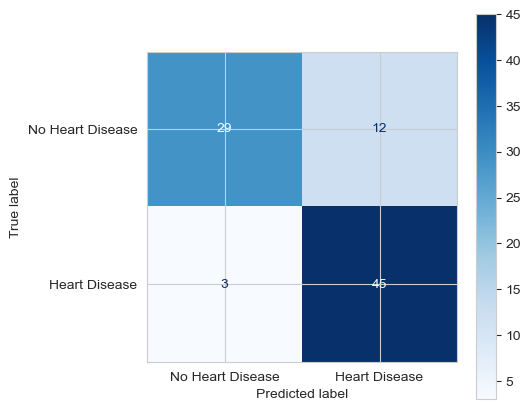

In [ ]:
y_pred = grid.predict(X_test)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

labels = ["No Heart Disease", "Heart Disease"]


# print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

#displaying confusion matrix using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues")
plt.rcParams['figure.figsize'] = (5, 5)
plt.show()

# 10.0 Model Saving

In [ ]:
#import pickle

#save the best model from grid search
#with open('model.pkl', 'wb') as f:
#    pickle.dump(grid_search.best_estimator_,f)